## Import Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## Load and Display data

In [2]:
df = pd.read_csv('pokemon.csv')
print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB
None
                #      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std    208.343798  119.96304   25.534669   32.457366   31.183501   32.722294   
min      1.000000  180.00000    1.000000    5.000000    5.000000   10.000000   

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Descriptive statistics (Data Analysis + Visualization)

In [3]:
df.groupby(['Type 1']).sum()['Total']

Type 1
Bug         26146
Dark        13818
Dragon      17617
Electric    19510
Fairy        7024
Fighting    11244
Fire        23820
Flying       1940
Ghost       14066
Grass       29480
Ground      14000
Ice         10403
Normal      39365
Poison      11176
Psychic     27129
Rock        19965
Steel       13168
Water       48211
Name: Total, dtype: int64

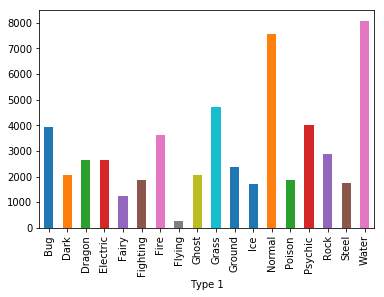

In [4]:
df.groupby(['Type 1'])['HP'].sum().plot.bar();

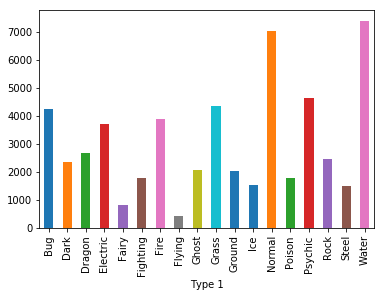

In [5]:
df.groupby(['Type 1'])['Speed'].sum().plot.bar();

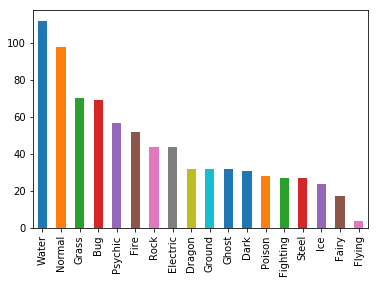

In [6]:
df['Type 1'].value_counts().plot.bar();

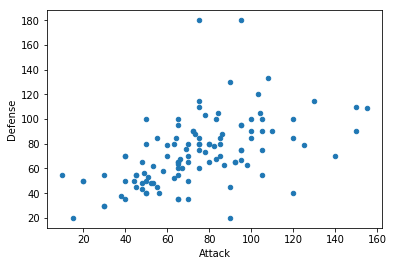

In [7]:
df[df['Type 1']=='Water'].plot.scatter(x="Attack", y="Defense");

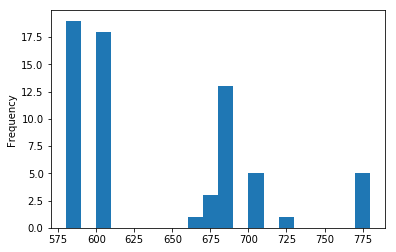

In [8]:
 df[(df['Total'] > 150) & (df['Legendary']==True)]['Total'].plot.hist(alpha = 1,bins=20);

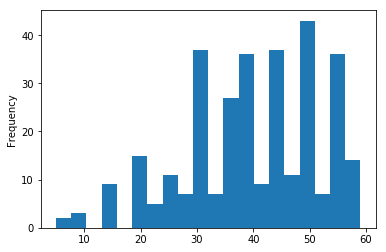

In [9]:
 df[(df['Speed'] < 60) & (df['Legendary']==False)]['Speed'].plot.hist(alpha = 1,bins=20);

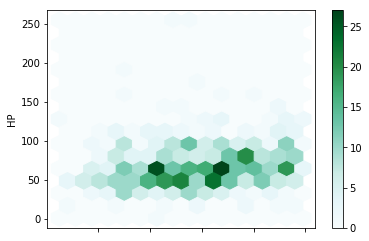

In [10]:
df[df['Speed'] < 100].plot.hexbin(x='Speed', y='HP', gridsize=15);

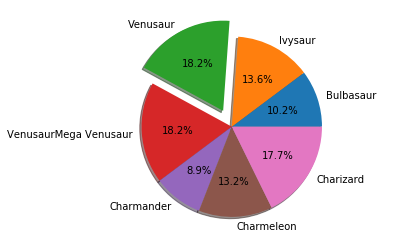

In [11]:
ddf = df.head(7)
explode = (0, 0, 0.2, 0,0,0,0)
plt.pie(ddf['HP'],explode=explode,labels=ddf['Name'],autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.show()

## Pre-Processing

### 1. Feature Enfineering

In [12]:
df = df[['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation','Legendary']]
df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,318,45,49,49,65,65,45,1,False
1,405,60,62,63,80,80,60,1,False
2,525,80,82,83,100,100,80,1,False
3,625,80,100,123,122,120,80,1,False
4,309,39,52,43,60,50,65,1,False


### 2. Label Encoding

In [13]:
df['Legendary'] = LabelEncoder().fit_transform(df['Legendary'])
df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,318,45,49,49,65,65,45,1,0
1,405,60,62,63,80,80,60,1,0
2,525,80,82,83,100,100,80,1,0
3,625,80,100,123,122,120,80,1,0
4,309,39,52,43,60,50,65,1,0
